<a href="https://colab.research.google.com/github/tantai17132002/do_an_1/blob/main/amthucnhahang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('thongtinnhahang.csv', encoding='latin-1', index_col = False)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


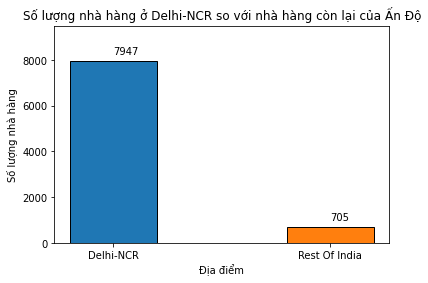

In [49]:
# Tinh chỉnh tên thành phố ở Quốc gia Ấn Độ
def changeCity(city):
    if city=='New Delhi'or city=='Ghaziabad' or city=='Noida' or city=='Gurgaon' or city=='Faridabad':
        return 'Delhi-NCR'
    else:
        return 'Rest Of India'
df.City[df['Country Code']==1]=df.City[df['Country Code']==1].apply(changeCity)
# Đếm số nhà hàng có vị trí Delhi-NCR
restaurants_delhi=df.City[df['City']=='Delhi-NCR'].count()
# Đếm số nhà hàng có địa điểm Rest Of India
restaurants_other=df.City[df['City']=='Rest Of India'].count()
# Vẽ biểu đồ
plt.title('Số lượng nhà hàng ở Delhi-NCR so với nhà hàng còn lại của Ấn Độ')
plt.xlabel('Địa điểm')
plt.ylabel('Số lượng nhà hàng')
plt.bar(height=restaurants_delhi,x='Delhi-NCR',width=0.4,edgecolor='black')
plt.bar(height=restaurants_other,x='Rest Of India',width=0.4,edgecolor='black')
plt.text(x='Delhi-NCR', y=restaurants_delhi+300,s=restaurants_delhi)
plt.text(x='Rest Of India',y=restaurants_other+300,s=restaurants_other)
plt.ylim(0,9500)
plt.show()

In [50]:
# Ẩm thực của Delhi-NCR
delhi_cuisines=df.Cuisines[df['City']=='Delhi-NCR']
# Món ăn tổng hợp của phần còn lại của Ấn Độ
rest_cuisines=df.Cuisines[df['City']=='Rest Of India']
delhi_dict={}
# Giá trị Ẩm thực được phân tách bằng dấu phẩy
for i in delhi_cuisines.values:
    # Tạo mảng các giá trị khác nhau
    array=i.strip().split(",")
    # Thêm giá trị duy nhất vào từ điển
    for ele in array:
        if ele.strip() in delhi_dict:
            delhi_dict[ele.strip()]+=1
        else:
            delhi_dict[ele.strip()]=1
rest_dict={}
# Làm quy trình tương tự cho Rest Of India
for i in rest_cuisines.values:
    array=i.strip().split(",")
    for ele in array:
        if ele.strip() in rest_dict:
            rest_dict[ele.strip()]+=1
        else:
            rest_dict[ele.strip()]=1
# Chuyển các khóa của từ điển thành một bộ
a1=delhi_dict.keys()
a2=rest_dict.keys()
a1=set(a1)
a2=set(a2)
# Tận dụng sự khác biệt của các set ăn để nhận các món ăn không có ở Delhi-NCR nhưng ở Rest Of India
print('Cuisines which are not present in Delhi-NCR but in Rest Of India according to the data-set')
final=list(a2-a1)
print(*final)
# Kiểm tra tất cả các món ăn với Zomato-API
import requests as req
# Tiêu đề bắt buộc phải được chuyển trong yêu cầu nhận (Tích lũy tài liệu)
h={
    'Accept':'application/json',
    'user-key':'11caaee84b90b16fe8fdb958bf8db957'
}
# Thông số
p={
    # ID thành phố của Delhi-NCR là 1
    'city_id':1
}
# Nhận Yêu cầu
res=req.get('https://developers.zomato.com/api/v2.1/cuisines',headers=h,params=p)
data=res.json()
api_cuisine_array=[]
# Tạo mảng ẩm thực từ dữ liệu nhận được

for i in data['cuisines']:
    api_cuisine_array.append(i['cuisine']['cuisine_name'])
print('Món ăn không có ở Delhi-NCR nhưng có ở Rest Of India theo Zomato API')
api_cuisine_array=set(api_cuisine_array)
print(*list(set(final)-api_cuisine_array.intersection(set(final))))

Cuisines which are not present in Delhi-NCR but in Rest Of India according to the data-set
Cajun Malwani German BBQ
Món ăn không có ở Delhi-NCR nhưng có ở Rest Of India theo Zomato API
Cajun Malwani German



   Cuisine Type  Number Of Restaurants
0  North Indian                   3597
1       Chinese                   2448
2     Fast Food                   1866
3       Mughlai                    933
4        Bakery                    697
5  South Indian                    569
6   Continental                    547
7      Desserts                    542
8   Street Food                    538
9       Italian                    535

   Cuisine Type  Number Of Restaurants
0  North Indian                    349
1       Chinese                    242
2   Continental                    177
3       Italian                    147
4          Cafe                    136
5     Fast Food                     97
6  South Indian                     62
7       Mughlai                     59
8      Desserts                     55
9       Mexican                     50


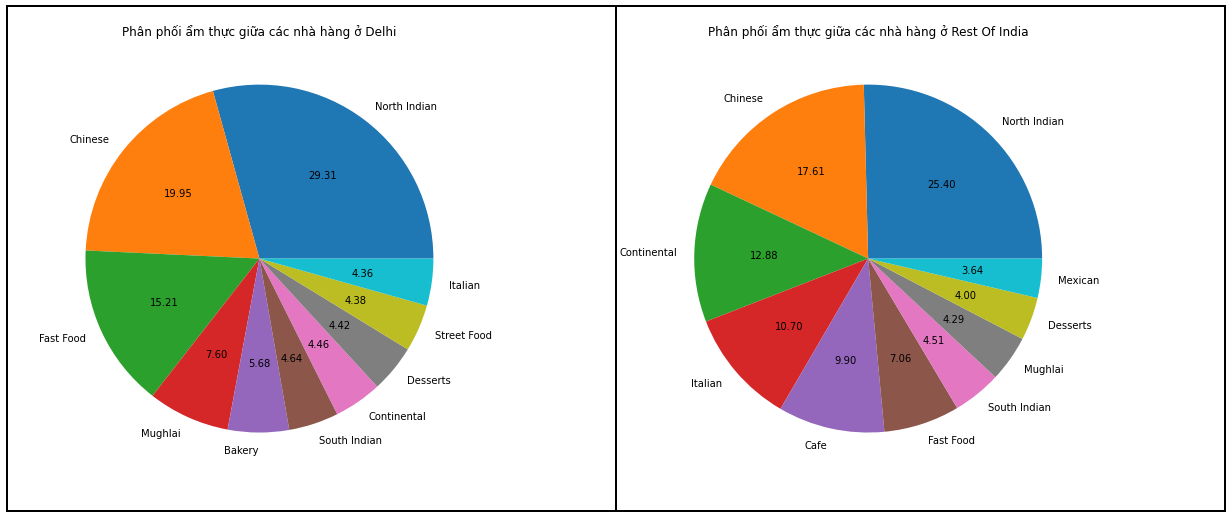

In [51]:
from pylab import *
# Sắp xếp Món ăn dựa trên không có nhà hàng ở Delhi-NCR
max_delhi=sorted(delhi_dict,key=delhi_dict.get,reverse=True)
print()
delhi=pd.DataFrame(((max_delhi[i],delhi_dict[max_delhi[i]]) for i in range(10)),columns=['Cuisine Type','Number Of Restaurants'])
print(delhi)
# Sắp xếp món ăn dựa trên không có nhà hàng ở Rest Of India
max_rest=sorted(rest_dict,key=rest_dict.get,reverse=True)
print()
rest=pd.DataFrame(((max_rest[i],rest_dict[max_rest[i]]) for i in range(10)),columns=['Cuisine Type','Number Of Restaurants'])
print(rest)
# vẽ biểu đồ hình tròn
# chia biểu đồ thành hai ô con
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
axs[0].pie(x=delhi['Number Of Restaurants'],labels=delhi['Cuisine Type'],autopct="%.2f")
axs[1].pie(x=rest['Number Of Restaurants'],labels=rest['Cuisine Type'],autopct="%.2f")
axs[0].title.set_text('Phân phối ẩm thực giữa các nhà hàng ở Delhi')
axs[1].title.set_text('Phân phối ẩm thực giữa các nhà hàng ở Rest Of India')
autoAxis = axs[0].axis()
# Tạo đường viền xung quanh biểu đồ hình tròn
rec = Rectangle((autoAxis[0]-0.2,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=2)
rec = axs[0].add_patch(rec)
rec.set_clip_on(False)
autoAxis = axs[1].axis()
rec = Rectangle((autoAxis[0]-0.2,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=2)
rec = axs[1].add_patch(rec)
rec.set_clip_on(False)
plt.show()